# Classifying Netflix Title Types
This project deals with classifying the target column type of the dataset using Random Forest Classifier. Here, we deal with everything starting from Data cleaning to deriving and explaining meaningful insights. 

# Importing Libraries 
Importing Standard Libraries such as pandas and numpy,etc.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset Creation
Created the dataset using the csv file which was imported locally from the device (This can be replaced with the link)

In [2]:
df=pd.read_csv("netflix_titles.csv")
target=df['type']
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Checking For Null Values & Data Cleaning
One of the fundamental steps of this process, Doing this will let us know the amount of null values then we can act on the numbers accordingly 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Filled with 'Unknown' as the amount of missing were more than 5%.(Imputing these will lead to biasness while model training)

In [5]:
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)

After Filling the missing values of column having more than 5%

In [6]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

Changed the type of the column 'date_added' from numeric to datetime and new columns to support the analysis

In [7]:
import datetime as dt
df['date_added']=pd.to_datetime(df['date_added'],format='%B %d, %Y',errors='coerce')
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [8]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           4
duration         3
listed_in        0
description      0
year_added      98
month_added     98
dtype: int64

Imputing the remaining column with median & mode (median for numeric and mode for categorical)

In [9]:
df['date_added'].fillna(df['date_added'].median(),inplace=True)
df['year_added'].fillna(df['year_added'].median(),inplace=True)
df['month_added'].fillna(df['month_added'].median(),inplace=True)
df[['date_added','year_added','month_added']].isnull().sum()

date_added     0
year_added     0
month_added    0
dtype: int64

In [10]:
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['duration'].fillna(df['duration'].mode()[0],inplace=True)
df['year_added']=pd.to_numeric(df['year_added'],downcast='integer', errors='coerce')
df['month_added']=pd.to_numeric(df['month_added'],downcast='integer', errors='coerce')

After Imputing, our dataset is clean and can be used for analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int16         
 13  month_added   8807 non-null   int8          
dtypes: datetime64[ns](1), int16(1), int64(1), int8(1), object(10)
memory usage: 851.6+ KB


# Data Exploration Through Graphs
Using various graph to explore and learn about the dataset

Target column distribution reveals that netflix has focused on adding more movies than TV Shows throughout their history

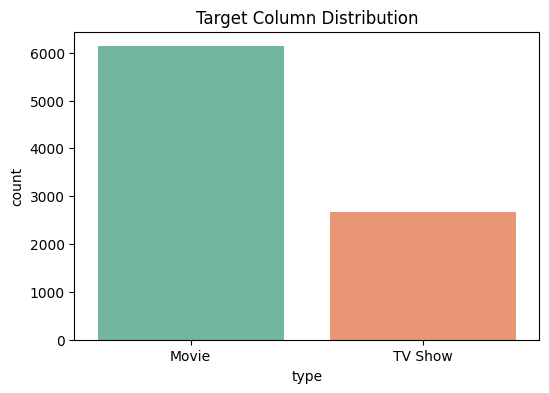

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='type',data=df,palette='Set2')
plt.title("Target Column Distribution")
plt.show()

Plotting the amount of titles released per year shows us that netflix's most amount of title added in a year was 2019 

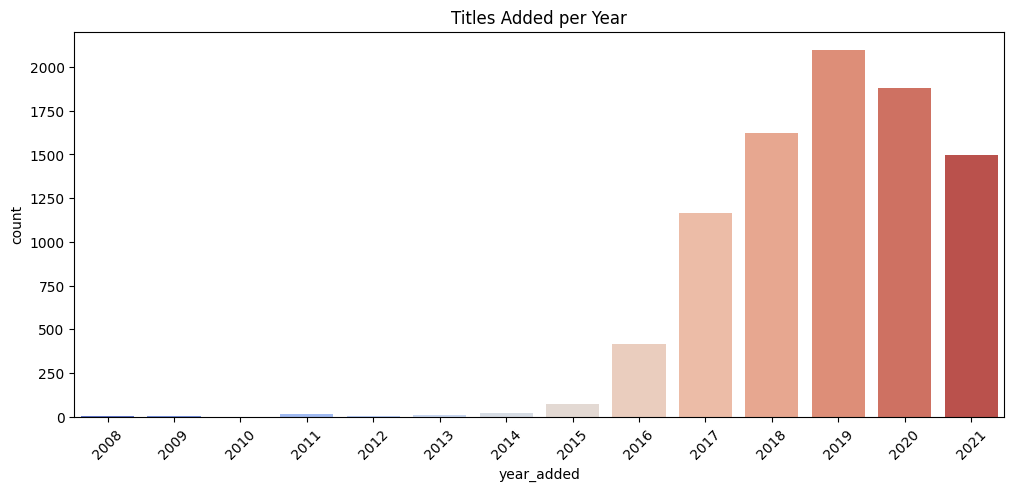

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='year_added',data=df,palette='coolwarm',order=sorted(df['year_added'].dropna().unique()))
plt.title("Titles Added per Year")
plt.xticks(rotation=45)
plt.show()

The graph plotted below shows us that the Movie content was always dominating 

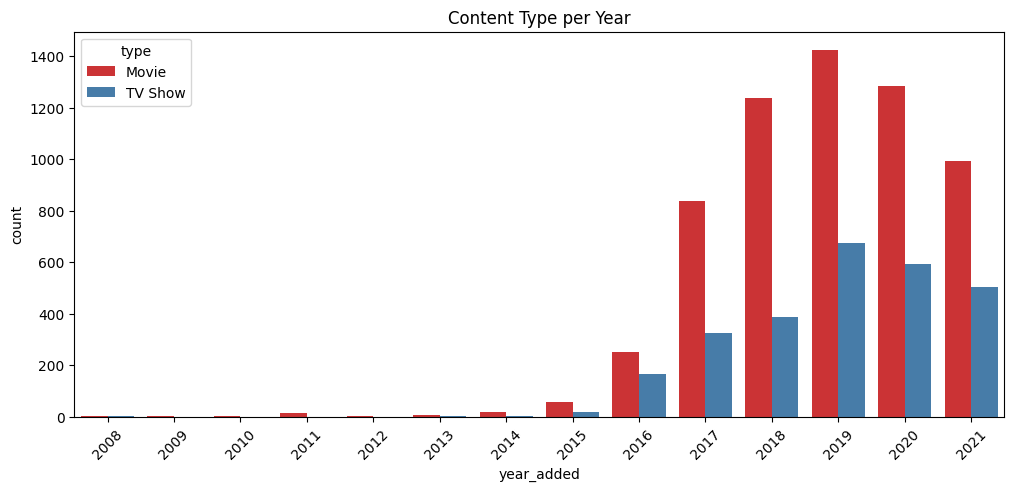

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='year_added', hue='type', data=df, palette='Set1', order=sorted(df['year_added'].dropna().unique()))
plt.title("Content Type per Year")
plt.xticks(rotation=45)
plt.show()

The distribution of Ratings of the content shows us the domination of 'TV-MA' rating 

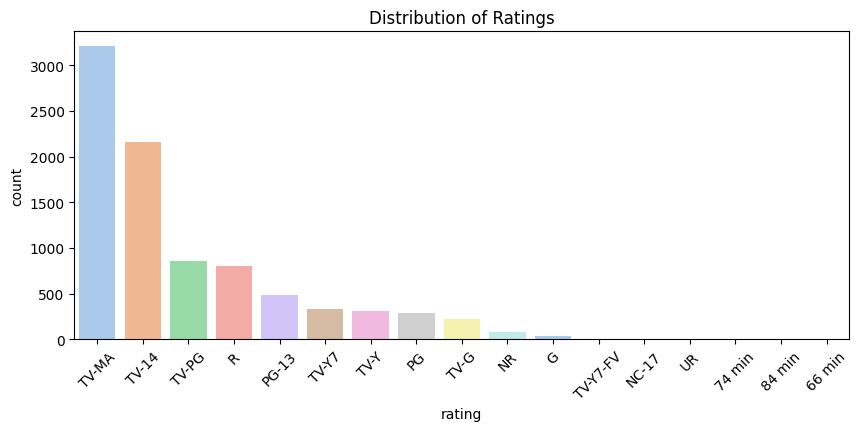

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(x='rating', data=df, palette='pastel', order=df['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.xticks(rotation=45)
plt.show()

# Data Transformation
Encoding values so that they can used for the analysis

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['rating_encoded']=le.fit_transform(df['rating'])
df['duration_encoded']=le.fit_transform(df['duration'])
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

Building a correlation matrix and visualizing that shows us the correlation of the numerical features of the dataset

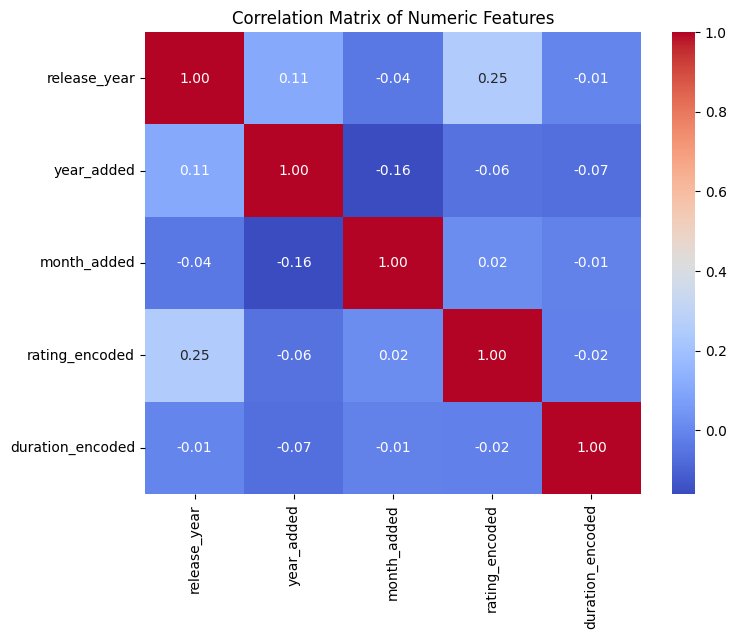

In [17]:
numeric_cols = ['release_year', 'year_added', 'month_added', 'rating_encoded', 'duration_encoded']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Model Training & Evaluation
Created a function that helps us that trains and evaluates a model along with a overfitting check and a feature importances graph

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def random_forest_analysis_cv(df, X_cols, y_col, test_size=0.2, random_state=42, cv=5):
    
    # Features and target
    X = df[X_cols]
    y = df[y_col]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Initialize Random Forest
    model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Train and test accuracy
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X, y, cv=cv)
    cv_mean = cv_scores.mean()
    
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"{cv}-Fold CV Mean Accuracy: {cv_mean:.4f}\n")
    
    # Overfitting check
    if test_acc < cv_mean - 0.05:
        print("⚠️ Possible overfitting detected (test accuracy below CV mean).\n")
        return model
    else:
        print("Model seems to generalize well.\n")
    
    # Classification report
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Feature importance
    importances = model.feature_importances_
    feat_importance = pd.Series(importances, index=X_cols).sort_values(ascending=True)
    
    plt.figure(figsize=(8,5))
    feat_importance.plot(kind='barh', color='teal')
    plt.title("Feature Importance")
    plt.show()
    
    return model


Training the model for the first time and upon evaluating it the 99% accuracy may look like overfitting but it's due to a leaky features as the overfiting check is negetive/Overfitting isn't detected 

Train Accuracy: 1.0000
Test Accuracy: 0.9852
5-Fold CV Mean Accuracy: 0.9636

Model seems to generalize well.

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1214
           1       0.98      0.97      0.98       548

    accuracy                           0.99      1762
   macro avg       0.98      0.98      0.98      1762
weighted avg       0.99      0.99      0.99      1762



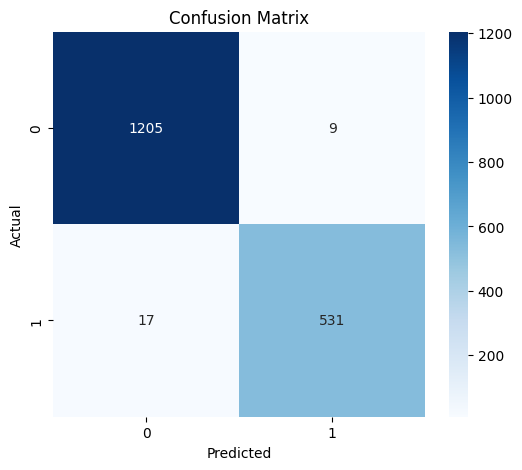

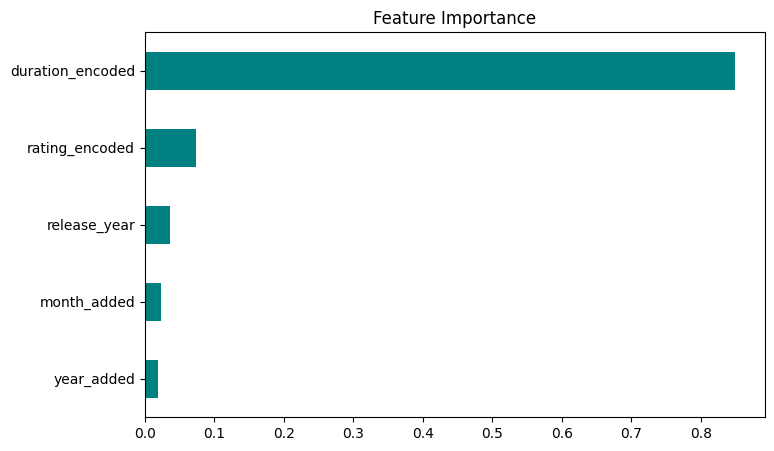

In [19]:
features = ['release_year', 'year_added', 'month_added', 'rating_encoded', 'duration_encoded']
target = 'type_encoded'

model = random_forest_analysis_cv(df, features, target)


Removing the duration feature results in a model which shows it's true predictive power, This model can learn from real patterns instead of using the leaky feature

Train Accuracy: 0.8253
Test Accuracy: 0.7094
5-Fold CV Mean Accuracy: 0.6040

Model seems to generalize well.

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1214
           1       0.54      0.47      0.50       548

    accuracy                           0.71      1762
   macro avg       0.66      0.64      0.65      1762
weighted avg       0.70      0.71      0.70      1762



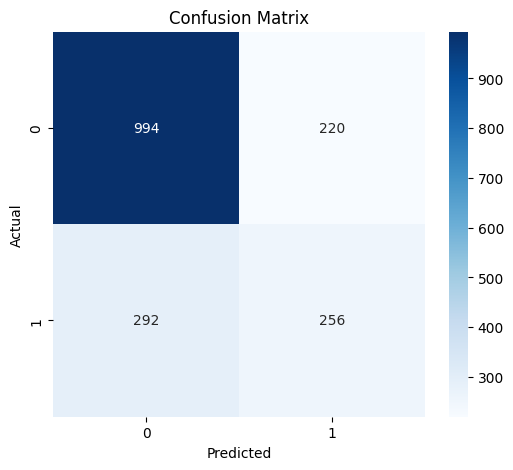

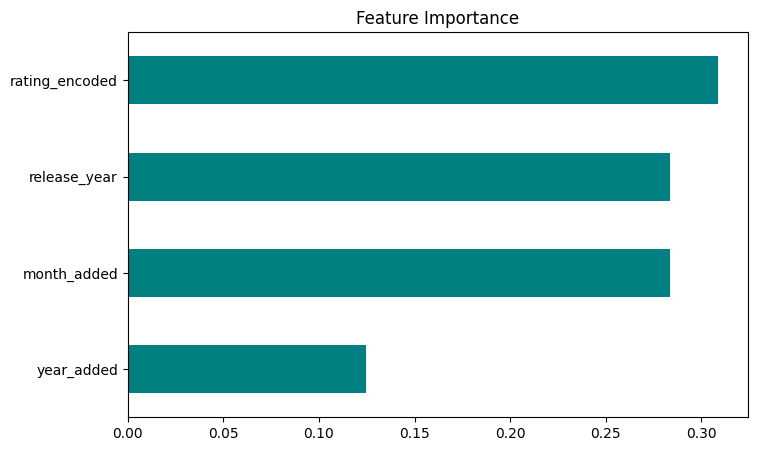

In [20]:
features = ['release_year', 'year_added', 'month_added', 'rating_encoded']
target = 'type_encoded'

model = random_forest_analysis_cv(df, features, target)


# Prediction and Conclusion
Using the model with 71% accuracy to classify the target column and Visualizing the results

Building and predicting the results by using the entire dataset 

In [21]:
from sklearn.ensemble import RandomForestClassifier
features = ['release_year', 'year_added', 'month_added', 'rating_encoded']
target = 'type_encoded'
X = df[features]
y = df[target]

final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)
df['predicted_type'] = final_model.predict(X)


Feature importance graph shows us that ratings and release years were key features for classification

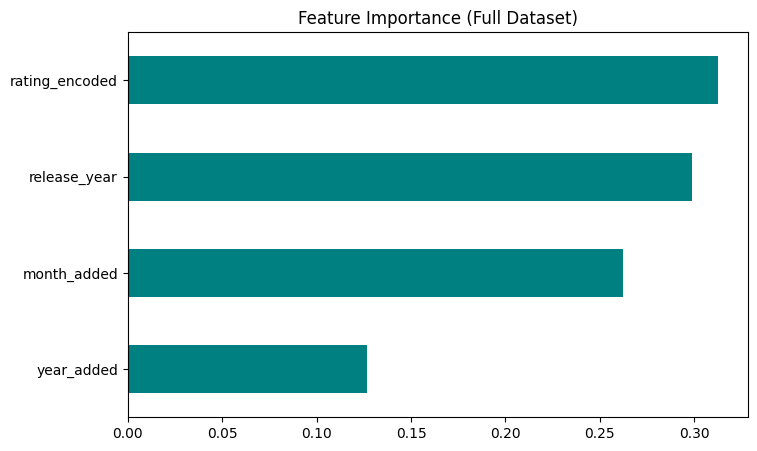

In [22]:
importances = final_model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8,5))
feat_importance.plot(kind='barh', color='teal')
plt.title("Feature Importance (Full Dataset)")
plt.show()


Distribution of the predicted results show us results similar to the original data

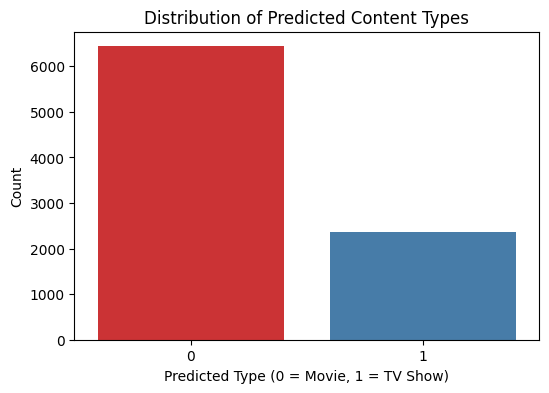

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='predicted_type', data=df,palette="Set1")
plt.title("Distribution of Predicted Content Types")
plt.xlabel("Predicted Type (0 = Movie, 1 = TV Show)")
plt.ylabel("Count")
plt.show()

# Conclusion
This project successfully built and evaluated a machine learning classifier that predicts whether a Netflix title is a Movie or a TV Show based on key metadata.
Through systematic data cleaning, encoding, visualization, and model evaluation, the analysis helped us classify the target with decent accuracy.
The model’s performance demonstrates how data analytics and machine learning can be applied to media datasets.